In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(suppress=True)

# Minimos cuadrados

Supongamos que tenemos un conjunto de $n$ datos $(X, Y)$, donde $Y$ es un vector de $n$ observaciones $y^{[i]}$, y $X$ es una matriz con $n$ filas y $m$ columnas. La $i$-ésima fila contiene las $m$ características del dato $x^{[i]}$. Queremos hacer un modelo $f(x, \beta)$, el cual nos permita conocer el valor de un $x$ desconocido, suponiendo que proviene de la misma distribución del conjunto de datos $(X, Y)$. Además, queremos que el modelo pueda ser "ajustado" a partir de un vector de parámetros $\beta$. El objetivo es encontar el vector de parámetros $\beta$ que mejor se ajuste a los datos. Esto es, para un $x^[i]$ del conjunto de datos, queremos minimizar la diferencia $r_i$ entre el valor $f(x^{[i]}, \beta)$ arrojado por el modelo y las observaciones reales $y^{[i]}$:

$$r^{[i]} = y^{[i]} - f(x^{[i]}, \beta)$$

El método de mínimos cuadrados encuentra el $\beta$ óptimo minimizando la suma de los residuos al cuadrado:

$$S = \sum_{i = 1}^n (r^{[i]})^2$$

Definamos el modelo $f(x, \beta)$ como un modelo lineal de la siguiente forma:

$$f(x, \beta) = \beta_0 + x_1\beta_1 + ... + x_n\beta_n.$$

Para escribir la definición del modelo de manera matricial, añadamos una entrada extra a cada vector de características, de tal manera que $x^{[i]} = [1, x^{[i]}_1, ..., x^{[i]}_n]$. Con esto, el producto matricial $X\beta$ corresponde a un vector de $n$ entradas, tal que en la $i$-ésima entrada se encuentra el valor de $f(x^{[i]}, \beta)$. Notemos que la suma $S$ de residuos cuadráticos se interpreta como la suma de las entradas de $Y - X\beta$ al cuadrado. Esto precisamente la diferencia euclidiana entre el vector $Y$ y el vector $X\beta$ al cuadrado. 

$$S = ||Y - X\beta ||_2^2,$$

y de esta forma el objetivo es entonces encontrar un $\beta$ que minimice tal diferencia. El vector $X\beta$ se encuentra en el espacio columna de $X$, de lo que se sigue que  $X\beta$ debe ser la proyección ortogonal de $Y$ sobre el espacio columna de $X$, para que la distancia de $X\beta$ a $Y$ sea mínima. En otras palabras, $Y - X\beta$ debe ser ortogonal al espacio columna de $X$. En símbolos

$$X^T(Y - X\beta) = 0.$$

Operando esta expresión para despejar $\beta$ obtenemos

$$X^TY - X^TX\beta = 0$$

$$X^TX\beta  = X^TY$$

Suponiendo que $X^TX$ es invertible, tenemos que

$$\beta = (X^TX)^{-1}X^TY.$$

La anterior se conoce como la ecuación normal de mínimos cuadrados, por lo que podemos obtener una solución única para el problema de minimización, siempre que $(X^TX)$ sea invertible. Si $X$ fuese invertible, entonces podríamos encontrar una solución tal que $||Y - X\beta ||_2^2 = 0$, pero esto raramente sucede. Para que $(X^TX)$ sea invertible, necesitamos que las columnas y las filas de $X$ sean linealmente independiente. Esto puede fallar si las características tienen relaciones lineales entre si (en este caso, las columnas son linealmente dependientes) o si hay relaciones lineales entre los datos (en este caso, las filas son linealmente dependientes). En cualquiera de los dos casos, el núcleo sería no trivial, por lo que existiría un vector no nulo $v$ tal que $Xv = 0$, y por lo tanto $X^TXv = 0$, por lo que $X^TX$ no sería invertible.



## Ejemplo

A continuación, realizamos una implementación del método de mínimos cuadrados. Empezamos una matriz de diseño $X$ y un vector de observaciones $Y$. 


In [94]:
# Generar datos
Y = np.array([2, 3, 5, 10, 11, 15, 14])  # Vector de observaciones
Y = Y[:, np.newaxis]

X = np.array([  
    [0],
    [1],
    [4],
    [6],        # Matriz de diseño
    [8],
    [9],
    [10]
])

Ahora, graficamos estos puntos en plano. Notemos que obedecen una relación lineal.

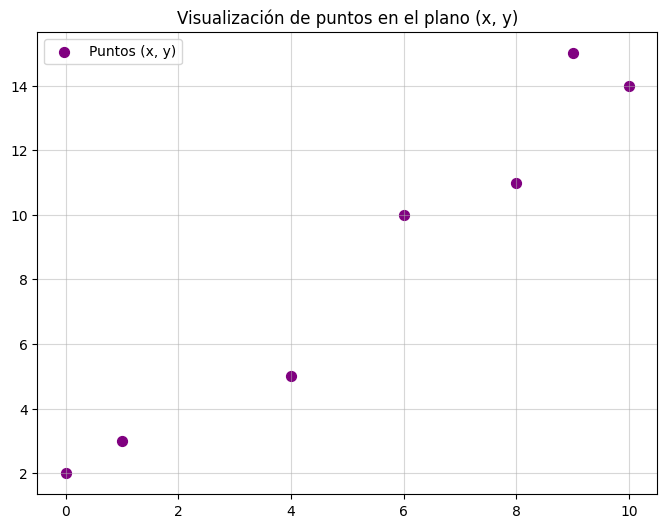

In [139]:
# Crear puntos (x, y) en el plano
points_x = X.flatten()  # Extraer coordenadas x
points_y = Y  # Coordenadas y correspondientes

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(points_x, points_y, color='purple', label='Puntos (x, y)', s=50, )
# Configuración del gráfico

plt.grid(alpha=0.5)
plt.title('Visualización de puntos en el plano (x, y)')
plt.legend()
plt.show()

Para escribir el producto de forma matricial, primero convertimos $X$ a la forma correcta añadiendo una columna de $1$'s. 

In [73]:
X_ = np.concatenate((np.ones((7, 1)), X), axis=1)
X_

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

Ahora, definimos la función para el modelo, la cual recibe un vector de parámetros y devuelve la predicción.

In [74]:
def model(x, beta):
    return x @ beta

Veamos un ejemplo para un vector de parámetros $\beta = [-1, -1]$.

In [75]:
beta =  -np.ones((2, 1))

print(f'X = \n{X_}')
print(f'\nβ = \n{beta}')
print(f'\nXβ = \n{model(X_, beta)}')

X = 
[[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]

β = 
[[-1.]
 [-1.]]

Xβ = 
[[ -1.]
 [ -2.]
 [ -5.]
 [ -7.]
 [ -9.]
 [-10.]
 [-11.]]


Hallemos el $\beta$ que reduce la distancia entre $Y$ y $X\beta$ mediante las ecuaciones normales:

In [122]:
XtX_inv = np.linalg.inv(X_.T @ X_)
beta = XtX_inv @ X_.T @ Y
beta

array([[1.4517],
       [1.3115]])

Comprobemos que $Y - X\beta$ es ortogonal al espacio columna de $X$:

In [126]:
X_.T @ (Y - X_ @ beta)

array([[-0.],
       [-0.]])

El vector de predicciónes se interpreta como el intercepto y la pendiente de una recta:

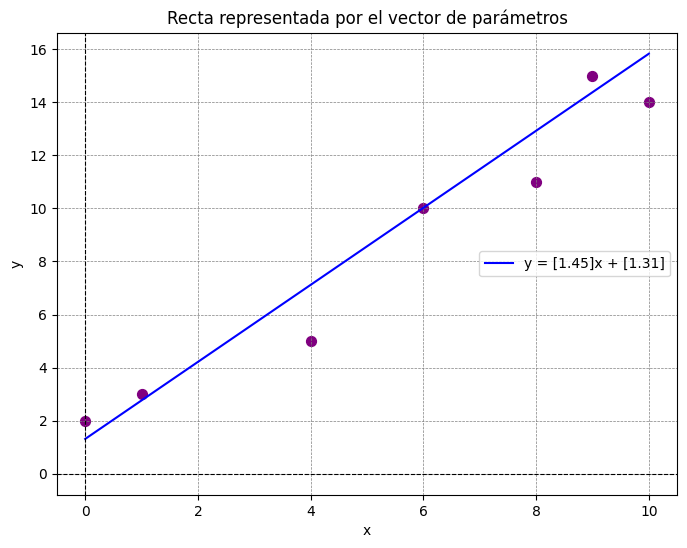

In [145]:
x = np.linspace(0, 10, 100)  # Rango de valores de x
# Calcular valores de y
m, b = beta[0], beta[1]
y = m * x + b

# Graficar la recta
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'y = {m}x + {b}', color='b')
plt.axhline(0, color='black',linewidth=0.8, linestyle="--")  # Eje x
plt.axvline(0, color='black',linewidth=0.8, linestyle="--")  # Eje y
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Recta representada por el vector de parámetros')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.scatter(points_x, points_y, color='purple', label='Puntos (x, y)', s=50)
plt.show()

points_x = X.flatten()  # Extraer coordenadas x
points_y = Y  # Coordenadas y correspondientes

# Visualización

